# K-pop Idols

* **Data:** `kpop_idols.csv`
* **Description:** K-pop is Korean pop music. It's popular the world over, especially when their fans take over Twitter hashtags. Idols are the individual musicians. Note that this dataset is not necessarily current k-pop idols, but includes people from the past, too (for example: group memberships might not be current).
* **Source:** https://www.kaggle.com/kimjihoo/kpopdb
* **Columns of interest:**
    * These are pretty self-explanatory. Just know "Birthplace" is the city they were born in, while "Country" is the country.

## Read in your data

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("kpop_idols.csv")


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['stage_name', 'full_name', 'korean_name', 'k._stage_name',
       'date_of_birth', 'group', 'country', 'birthplace', 'other_group',
       'gender'],
      dtype='object')

## What is the percentage of male vs female kpop idols?

In [12]:
df.gender.value_counts(normalize=True)

M    0.516031
F    0.483969
Name: gender, dtype: float64

## Not all idols are born in South Korea: make a horizontal bar plot of the top five countries they're from, with the longest bar at the top.

<AxesSubplot:>

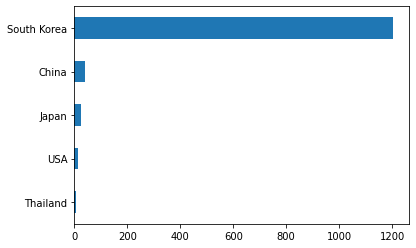

In [72]:
df.country.value_counts().head().sort_values().plot(kind='barh')


## For **only** the idols born in Japan, what are the top 2 cities they were born in?

In [18]:
df[df.country == 'Japan'].birthplace.value_counts().head(2)

Osaka    3
Tokyo    2
Name: birthplace, dtype: int64

## What group has the most members in our dataset?

In [22]:
df.group.value_counts()
#NCT

NCT             18
14U             14
Cosmic Girls    13
Seventeen       13
The Boyz        12
                ..
Rockit Girl      2
15&              2
JBJ95            1
Nature           1
Good Day         1
Name: group, Length: 208, dtype: int64

## Save a CSV file of just idols from Canada, calling it `canada.csv`.

In [30]:
df[df.country == 'Canada']
canada_df = df[df.country == 'Canada']
canada_df.to_csv('canada.csv', index=False)

## How many idols are members of `Super Junior-M`?

Count both `Group` and `Other Group`.

In [40]:
super_jr1 = df[df.group == 'Super Junior-M'].full_name.value_counts().sum()

In [41]:
super_jr2 = df[df.other_group == 'Super Junior-M'].full_name.value_counts().sum()

In [42]:
super_jr1 + super_jr2

8

## Create a new column called `age` that is the age of the idol.

There are a few ways you can do this, but when calculating the age **just use the year**, you don't need to worry if they've had a birthday or not in 2021. For example, A.M. was born in 1996, so we would say she is **2021 - 1996 = 25 years old**.

In [46]:
df.date_of_birth

pd.to_datetime(df.date_of_birth, errors="coerce", format="%Y-%m-%d")
df.date_of_birth = pd.to_datetime(df.date_of_birth, errors="coerce", format="%Y-%m-%d")
df.date_of_birth

0      1996-12-31
1      1992-08-28
2      1999-10-25
3      1999-09-27
4      2001-02-21
          ...    
1305   1997-06-16
1306   1994-06-09
1307   2005-05-31
1308   1996-07-04
1309   1994-12-08
Name: date_of_birth, Length: 1310, dtype: datetime64[ns]

In [56]:
df['age'] = 2021 - df.date_of_birth.dt.year
df.age
df.head()

,stage_name,full_name,korean_name,k._stage_name,date_of_birth,group,country,birthplace,other_group,gender,age
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M,25
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M,29
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F,22
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F,22
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,20


## Who are the four oldest idols in our dataset?

In [71]:
df.age.sort_values().tail(4)
#i know there's a way to do this to get the whole df info for these four ppl, but I'm not sure what it is! 

822    40
480    40
624    41
844    44
Name: age, dtype: int64

## What is the median age of male vs female idols?

In [61]:
df.groupby(by='gender').age.median()

gender
F    25.0
M    26.0
Name: age, dtype: float64